# Alpha Solutions Fraud Detection
## Overview of Fraud Detection
### Fraud is the event of illegal access or execution of a transaction. Fraud modeling is the process where large amounts of transactional data is analyzed to identify observations which do not generally follow the regular patterns. Due to this nature of the problem, anamoly detection and some classification techniques are most suited to analyze such problems and draw valuable insights.
## Problem Statement
### A company Alpha solutions provides fraud detection products, solutions and services to financial businesses. One such financial client has many credit card transactions that are provided as the training data. They want the Financial Data Scientist to build models using the available training data.

In [ ]:
## Dataset
### Dataset consists of 5 variables
### F:Fraud,G:Gas.J:Jewellery,S:Sex,A:Age
### Dataset consits of 1000 rows

## Importing the essential pasckages

In [1]:
import pandas as pd
import numpy as np

In [ ]:
dataframe=pd.read_csv('fraud_data.csv')

## Importing the dataset using pandas and storing in dataframe

## Observing the data set using data.head() function

In [3]:
dataframe.head(10)

,S,A,F,J,G
0,0,2,1,0,1
1,0,0,1,0,1
2,0,2,1,0,1
3,0,1,1,0,1
4,0,2,0,1,1
5,0,1,1,0,1
6,0,1,0,1,1
7,1,1,1,1,1
8,1,2,1,0,1
9,1,0,1,0,0


### We can observe four features S,A,F,J,G and we have no information about them with us.
### Therefore let us condiser S,A,G,J as  independent variables and J as dependent variables.

## Split the dataframe into independent and dependent features

In [4]:
x=dataframe.iloc[:,[0,1,2,4]]
y=dataframe.iloc[:,3]

## Now let us observe dataframes x and y

In [5]:
x.head()

,S,A,F,G
0,0,2,1,1
1,0,0,1,1
2,0,2,1,1
3,0,1,1,1
4,0,2,0,1


In [6]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: J, dtype: int64

## Data preprocessing
### Feaures Scaling: Not required as all the values are confined to very small range
### Missing Data:Not required as all the values are present and there are no missing values
### Encoding categorical variables: Not required as all the features are already encoded

## Splitting data into training and testing datasets
### It is essential to test our model on data that is not trained in order to know the real power of our model
### Therefore we are splitting the data into two sets that is test set and train set

In [7]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# let us draw some comparisons from the data

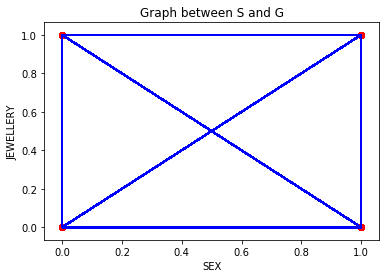

In [8]:
import matplotlib.pyplot as plt
plt.scatter(x_train['S'], y_train, color = 'red')
plt.plot(x_train['S'],y_train , color = 'blue')
plt.title('Graph between S and G')
plt.xlabel('SEX')
plt.ylabel('JEWELLERY')
plt.show()

## The above graph shows the dependency between variable S and J

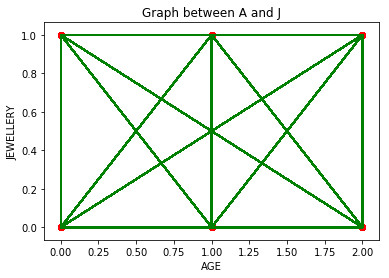

In [9]:
import matplotlib.pyplot as plt
plt.scatter(x_train['A'], y_train, color = 'red')
plt.plot(x_train['A'],y_train , color = 'green')
plt.title('Graph between A and J')
plt.xlabel('AGE')
plt.ylabel('JEWELLERY')
plt.show()

## The above graph shows the dependency between variable A and G

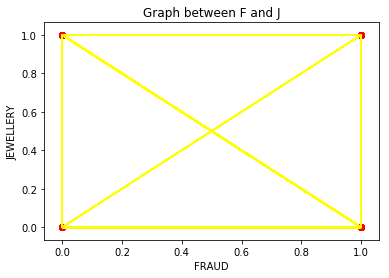

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x_train['F'], y_train, color = 'red')
plt.plot(x_train['F'],y_train , color = 'yellow')
plt.title('Graph between F and J')
plt.xlabel('FRAUD')
plt.ylabel('JEWELLERY')
plt.show()

## The above graph shows the dependency between variable F and G

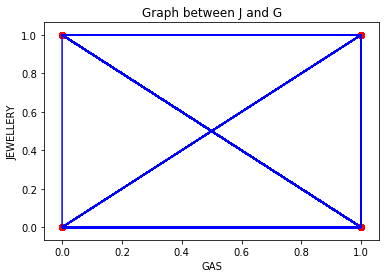

In [11]:
import matplotlib.pyplot as plt
plt.scatter(x_train['G'], y_train, color = 'red')
plt.plot(x_train['G'],y_train , color = 'blue')
plt.title('Graph between J and G')
plt.xlabel('GAS')
plt.ylabel('JEWELLERY')
plt.show()

## The above graph shows the dependency between variable F and G

## Fitting the dataset in logistic regression model 

In [12]:
from sklearn.linear_model import LogisticRegression
classifier_logisticreg=LogisticRegression()
classifier_logisticreg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting the y values using logistic regression model 

In [13]:
y_pred_logisticreg = classifier_logisticreg.predict(x_test)

## To evaluate number of correct and wrong predictions, we can use the confusion matrix 
## Confusion matrix returns a 2x2 matrix 


## First row first element and second row second element give the number of correct predictions while the remaining two are the wrong predicitons.

In [14]:
from sklearn.metrics import confusion_matrix
cm_logisticreg = confusion_matrix(y_test, y_pred_logisticreg)

In [15]:
cm_logisticreg

array([[1727,    8],
       [  97,  168]])

## Confusion matrix for logistic regression returned 1895 correct predictions and 105 wrong predictions. 

## Predicting the y values using Naive Bayes Algorithm

In [16]:
from sklearn.naive_bayes import GaussianNB
classifier_nb=GaussianNB()
classifier_nb.fit(x_train,y_train)

GaussianNB(priors=None)

In [17]:
y_pred_nb = classifier_nb.predict(x_test)

In [18]:
cm_nb = confusion_matrix(y_test, y_pred_nb)

In [19]:
cm_nb

array([[1709,   26],
       [  97,  168]])

## Confusion matrix returned 1877 correct predictions 

## Predicting the y values using support vector machine model

In [20]:
from sklearn.svm import SVC
classifier_svc=SVC(kernel='rbf')
classifier_svc.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [21]:
y_pred_svc=classifier_svc.predict(x_test)
cm_svc=confusion_matrix(y_test, y_pred_svc)

In [22]:
cm_svc

array([[1727,    8],
       [  97,  168]])

## Confusion matrix for Support vector machine  returned 1895 correct predictions

## Predicting the y_test values using decision tree model


In [23]:
from sklearn.tree import DecisionTreeClassifier
classifier_dec=DecisionTreeClassifier(criterion='entropy')
classifier_dec.fit(x_train,y_train)
y_pred_dec=classifier_dec.predict(x_test)
cm_dec=confusion_matrix(y_test, y_pred_dec)

In [24]:
cm_dec

array([[1727,    8],
       [  97,  168]])

## Total number of correct predictions using decision tree is 1895

## RandomForestClassifer  alogorithm for predicting

In [25]:
from sklearn.ensemble import RandomForestClassifier
classifier_rand=RandomForestClassifier(n_estimators=500,criterion='entropy',random_state=0)
classifier_rand.fit(x_train,y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=500, n_jobs=1, oob_score=False, random_state=0,
            verbose=0, warm_start=False)

In [26]:
y_pred_rand=classifier_rand.predict(x_test)
cm_rand=confusion_matrix(y_test, y_pred_rand)

In [27]:
cm_rand

array([[1727,    8],
       [  97,  168]])

## Total number of correct predictions using Random forest is 1895

## Finding accuracy of model

In [28]:
# the accuracy can be calculated as
accuracy=(1727+168)/(1727+168+97+8)
accuracy

0.9475

## Accuracy of the model is 94%